# Developing the data processing process
### - Problem Clarification.
    1. Check the data if all courses meet the given table's timeline.
    2. Data screening by credit/day/time required.

# [MSB539] Assignment#1

In [88]:
import pandas as pd #Import required libraries.
import numpy as np

df = pd.read_excel(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\3학기\인공지능\Assignment#1\Courses_21F.xlsx',
                  index_col = 0) #Load the data.
#print(df)

df.dropna(subset = ['LecTime'],inplace = True) #Drop rows which has NaN in 'LecTime' column.
#print(df)
df.reset_index(inplace = True) #Reset index to activate for() loop.
#print(df)

credits = []
for i in range(df.shape[0]): # Use 'L:E:C' column to generate 'Credit' column having only credit information.
    credits.append(float(df['L:E:C'][i].split(':')[-1]))
df['Credit'] = credits
#print(df)

In [90]:
time = []
for i in range(df.shape[0]): #Inspect all possible lecture time combinations in the data.
    for item in df['LecTime'][i].split('\r\n'):
        #print(item.split(' ')[1])
        time.append(item.split(' ')[1])
#time
#set(time)

{'08:30~10:30',
 '09:00~10:30',
 '09:00~12:00',
 '09:00~12:30',
 '09:00~14:00',
 '09:00~18:00',
 '09:30~10:30',
 '09:30~12:30',
 '10:00~11:00',
 '10:00~12:00',
 '10:00~13:00',
 '10:30~12:00',
 '10:30~12:30',
 '11:00~12:00',
 '11:00~14:00',
 '12:00~13:00',
 '13:00~14:00',
 '13:00~14:30',
 '13:00~15:00',
 '13:00~15:30',
 '13:00~16:00',
 '13:00~16:30',
 '13:00~17:00',
 '13:00~19:00',
 '13:00~22:00',
 '13:30~16:30',
 '14:00~15:00',
 '14:00~17:00',
 '14:30~15:30',
 '14:30~16:00',
 '14:30~16:30',
 '14:30~17:30',
 '14:30~18:30',
 '14:30~19:30',
 '14:30~20:30',
 '15:00~17:00',
 '15:00~18:00',
 '15:30~17:30',
 '15:30~19:30',
 '16:00~16:50',
 '16:00~17:00',
 '16:00~17:30',
 '16:00~18:00',
 '16:00~18:30',
 '16:00~19:00',
 '16:00~22:00',
 '16:15~17:15',
 '16:30~17:30',
 '16:30~17:45',
 '16:30~18:00',
 '16:30~18:30',
 '17:00~18:00',
 '17:00~19:00',
 '17:00~23:00',
 '17:30~19:00',
 '18:00~21:00',
 '18:30~21:30',
 '18:30~22:30',
 '19:00~20:00',
 '19:00~20:30',
 '19:00~21:00',
 '19:00~21:30',
 '19:00~

# Developing the data processing process (cont.)
### - Problem Clarification (cont.).
    1. Check the data if all courses meet the given table's timeline.
    2. Data screening by credit/day/time required.
    3. Courses with class time not exactly matching with given table's time critera needs to be handled.
        * Create both cases (table with courses exactly matching given timeline/ table with generous matching standard).

### - Table Generation Process.
    1. Individually create columns for required credit/day/time.
    2. Calculate credit/day/time line by line.
    3. Combination of both processes.
    
### - Handling the courses including two or more timeline.
    1. Find out start time's column number.
    2. Subtract end time with start time.
    3. Divide it by 90 minutes to calculate how many segments the class continues.
    4. Use range() function to count the course in countinuous rows.

In [107]:
credit = 1
conservative = 0

data = df[df['Credit'] >= credit] #Screen the given data with credit criteria.

data.reset_index(inplace = True) #reset data's index to properly function the 'for' loop.

table_credit = np.zeros([7,5]) #array to generate table counting courses.(table 1&3)
table_student=np.zeros([7,5]) #array to generate table counting students. (table 2&4)

dic_day = {'M':0,'T':1,'W':2,'Th':3,'F':4} #dictionary to translate given day into proper column.
dic_hour= {9.00:0, 10.50:1, 12.00:-1, 13.00:2, 14.50:3, 16.00:4, 17.50:5, 19.00:6} #dictionary to translate given timeline into proper row.

hours = [9.00,10.50,12.00,13.00,14.50,16.00,17.50,19.00] #Additional informations that i've used.
con_list = ['09:00~10:30','10:30~12:00','13:00~14:30','14:30~16:00','16:00~17:30', '17:30~19:00']

for i in range(data.shape[0]):
    #print(data['LecTime'][i])
    #print(' ')
    
    
    for item in data['LecTime'][i].split('\r\n'):
        #print(item)
        #print(' ')
        
        if item.split(' ')[0] not in ['Sn','S']: #discard weekends
            #print(item.split(' ')[0])
            #print(' ')
            
            day = dic_day[item.split(' ')[0]] #Calculate column number according to the given day.
            #print(day)
            #print(' ')
            
            if conservative == 0: #Include courses which overlaps the given timeline.
                
                start = item.split(' ')[1].split('~')[0].lstrip('0') #Extract starting time.
                end = item.split(' ')[1].split('~')[1].lstrip('0') #Extract ending time.
                #rint(start, end)
                #print(' ')
                
                if (start[-2:] == '15') or (start[-2:]=='45'):
                    start = start.replace('15','25').replace('45','75') #Replace non-30 in starting time.
                if (end[-2:] == '15') or (end[-2:]=='45'):
                    end = end.replace('15','25').replace('45','75')  #Replace non-30 in ending time.
                start = float(start.replace('30','50').replace(':','.')) #Convert string into float.
                end = float(end.replace('30','50').replace(':','.')) #Convert string into float.
                #rint(start, end)
                #print(' ')
                
                
                if end > 19: #Flatten the outliers above/below given timeline.
                    end = 20.5
                if start < 9:
                    start = 9
                elif start > 19:
                    start = 19
                #rint(start, end)
                #print(' ')
                    
                
                for i in range(len(hours)-1): #Flatten the starting/ending time between given timelines.
                    t = hours[i] # ex) start = 10:00, end = 11:00 -> start = 09:00, end = 12:00
                    tt = hours[i+1]
                    if t<start<tt:
                        start = t
                    if t<end<tt:
                        end = tt
                #rint(start, end)
                #print(' ')
                
                
                if start >= 19: #calculate courses having starting time over/including 1900.
                
                    hour = 6
                    table_credit[hour, day] +=1
                    table_student[hour, day] += data['Rstu'][i]

                elif start <19 and dic_hour[(start)]>-1: #Second term added in order to avoid classes starting at 12:00.
                    repeat = (end-start)//1.5 # 09:00~13:00 -> 13.0-9.0= 4//1.5 = 2
                    for i in range(int(repeat)): #range(2) = 0,1
                        table_credit[(dic_hour[(start)] +i), day] +=1 # (0,day) , (1,day)
                        table_student[(dic_hour[(start)] +i), day] += data['Rstu'][i]


            #Counting the only courses which exactly matches the starting and ending time of given timeline.
            if conservative == 1:

                if '19:00~' in item.split(' ')[1]:
                    hour = 6
                    table_credit[hour,day] +=1
                    table_student[hour,day] +=data['Rstu'][i] 
                    
                elif item.split(' ')[1] in con_list:
                    hour = dic_hour[float(item.split(' ')[1].split('~')[0].replace('30','50').replace(':','.'))]
                    table_credit[hour,day] +=1
                    table_student[hour,day] +=data['Rstu'][i] 


                    
table_credit = table_credit.astype(int)
table_student = table_student.astype(int)

#print(table_credit)
#print(' ')

table_credit = np.column_stack((table_credit,np.transpose(table_credit.sum(axis=1))))
#print(table_credit)
#print(' ')

table_credit = np.vstack((table_credit,table_credit.sum(axis=0)))
#print(table_credit)
#print(' ')

credit = pd.DataFrame(table_credit, index=['1(09:00~10:30)','2(10:30~12:00)','3(13:00~14:30)','4(14:30~16:00)',
                       '5(16:00~17:30)','6(17:30~19:00)','7(19:00~)','C_Total'], columns = ['M','T','W','Th','F','R_Total'])
#print(credit)

table_student = np.column_stack((table_student,np.transpose(table_student.sum(axis=1))))
table_student = np.vstack((table_student,table_student.sum(axis=0)))
student = pd.DataFrame(table_student, index=['1(09:00~10:30)','2(10:30~12:00)','3(13:00~14:30)','4(14:30~16:00)',
                       '5(16:00~17:30)','6(17:30~19:00)','7(19:00~)','C_Total'], columns = ['M','T','W','Th','F','R_Total'])



###  함수설명: course_classification(credit minimum, table type, conservative)
* credit Minimum(int): 입력한 숫자 이상의 학점을 가지고 있는 과목만 나타남.
* table type(student of course): return받을 표의 각 항목별 계산 기준 선택
* conservative(0 or 1): 조금만 시간이 겹쳐도 해당 범위로 계산할 것인지, 주어진 시간 범위와 정확히 일치하게 과목 시간을 계산할 것인지 선택.
    * Conservative == 0
        * 강의 시간이 sample table에서 사용한 시간 범위에 포함될 경우 시작시간 또는 종료시간이 정확히 일치하지 않아도 해당 시간 범위 내에 포함시킴.
        * 예시) 10:00 ~ 11:00 강의 -> 09:00 ~ 10:30 및 10:30~12:00에 모두 포함시킴.
        * 장시간 연강시 해당하는 시간 범위에 모두 포함시킴.
    * Conservative == 1
        * 강의 시간이 sample table에서 사용한 시간 범위에 정확히 일치할 경우 해당 시간 범위 내에 포함시킴.
        * 1시간 반 이상 연강은 해당 시간 범위에 포함되지 못함.
        * 예시) 10:00 ~ 11:00 강의 또는 09:00 ~ 12:00 강의는 표에서 count되지 못함.
* 데이터를 불러오는 function은 포함돼있지 않으므로, 함수 실행 이전에 데이터를 불러와줘야함.

In [3]:
def course_classification(credit, parameter, conservative):
    
    data = df[df['Credit'] >= credit] #Screen the given data with credit criteria.
    
    data.reset_index(inplace = True) #reset data's index to properly function the 'for' loop.
        
    table_credit = np.zeros([7,5]) #array to generate table counting courses.(table 1&3)
    table_student=np.zeros([7,5]) #array to generate table counting students. (table 2&4)
    
    dic_day = {'M':0,'T':1,'W':2,'Th':3,'F':4} #dictionary to translate given day into proper column.
    dic_hour= {9.00:0, 10.50:1, 12.00:-1, 13.00:2, 14.50:3, 16.00:4, 17.50:5, 19.00:6} #dictionary to translate given timeline into proper row.
    
    hours = [9.00,10.50,12.00,13.00,14.50,16.00,17.50,19.00] #Additional informations that i've used.
    con_list = ['09:00~10:30','10:30~12:00','13:00~14:30','14:30~16:00','16:00~17:30', '17:30~19:00'] #Additional informations that i've used.
    
    for i in range(data.shape[0]):# import index number into i.
        for item in data['LecTime'][i].split('\r\n'): # Seperate lectime information line by line and import it as item.
            if item.split(' ')[0] not in ['Sn','S']: #Only include items which dooesn't has 'S' or 'Sn' as day variable.                
                day = dic_day[item.split(' ')[0]] #save the column position by inputing day information into dic_day dictionary.
                
                
                if conservative == 0: #Include courses which overlaps the given timeline.
                    
                    start = item.split(' ')[1].split('~')[0].lstrip('0') #Extract starting time.
                    end = item.split(' ')[1].split('~')[1].lstrip('0') #Extract ending time.
                    
                    if (start[-2:] == '15') or (start[-2:]=='45'):
                        start = start.replace('15','25').replace('45','75') #Replace non-30 in starting time.
                    if (end[-2:] == '15') or (end[-2:]=='45'):
                        end = end.replace('15','25').replace('45','75') #Replace non-30 in starting time.
                        
                    start = float(start.replace('30','50').replace(':','.')) #Convert string into float.
                    end = float(end.replace('30','50').replace(':','.')) #Convert string into float.
                    
                    
                    
                    if end > 19: #Flatten the outliers above/below given timeline.
                        end = 20.5 
                    if start < 9:
                        start = 9
                    elif start > 19:
                        start = 19

                   
                    for i in range(len(hours)-1): #Flatten the starting/ending time between given timelines.
                        t = hours[i] # ex) start = 10:00, end = 11:00 -> start = 09:00, end = 12:00
                        tt = hours[i+1]
                        if t<start<tt:
                            start = t
                        if t<end<tt:
                            end = tt

                    
                    if start >= 19: #calculate courses having starting time over/including 1900.
                        hour = 6
                        table_credit[hour, day] +=1
                        table_student[hour, day] += data['Rstu'][i]

                    elif start <19: #Second term added in order to avoid classes starting at 12:00.
                        repeat = (end-start)//1.5 # 09:00~13:00 -> 13.0-9.0= 4//1.5 = 2
                        for i in range(int(repeat)): #range(2) = 0,1
                            table_credit[(dic_hour[(start)] +i), day] +=1 # (0,day) , (1,day)
                            table_student[(dic_hour[(start)] +i), day] += data['Rstu'][i]
                
                
                
                if conservative == 1: #Counting the only courses which exactly matches the starting and ending time of given timeline.s
                    if '19:00~' in item.split(' ')[1]:
                        hour = 6
                        table_credit[hour,day] +=1
                        table_student[hour,day] +=data['Rstu'][i] 
                    elif item.split(' ')[1] in con_list:
                        hour = dic_hour[float(item.split(' ')[1].split('~')[0].replace('30','50').replace(':','.'))]
                        table_credit[hour,day] +=1
                        table_student[hour,day] +=data['Rstu'][i] 
                        
    
    table_credit = table_credit.astype(int) #convert datatype into int, in order to use the np functions.
    table_student = table_student.astype(int)

    table_credit = np.column_stack((table_credit,np.transpose(table_credit.sum(axis=1)))) #calculate sum of rows into a new column.
    table_credit = np.vstack((table_credit,table_credit.sum(axis=0))) #calculate sum of columns into a new row.
    credit = pd.DataFrame(table_credit, index=['1(09:00~10:30)','2(10:30~12:00)','3(13:00~14:30)','4(14:30~16:00)', #Create dataframe.
                           '5(16:00~17:30)','6(17:30~19:00)','7(19:00~)','C_Total'], columns = ['M','T','W','Th','F','R_Total'])
    table_student = np.column_stack((table_student,np.transpose(table_student.sum(axis=1))))
    table_student = np.vstack((table_student,table_student.sum(axis=0)))
    student = pd.DataFrame(table_student, index=['1(09:00~10:30)','2(10:30~12:00)','3(13:00~14:30)','4(14:30~16:00)',
                           '5(16:00~17:30)','6(17:30~19:00)','7(19:00~)','C_Total'], columns = ['M','T','W','Th','F','R_Total'])
    
    if parameter == 'course': #If input parameter is course, returen credit table.
        return credit
    elif parameter == 'student': #If input parameter is student, returen student table.
        return student
    else:
        print('Please Enter Proper Parameter') # if input parameter is not course or student, returen error message.

In [4]:
#df와 title을 받아 potting 하는 함수 생성
def barplotting(df,title_string, y_axis):
    return df.drop(['C_Total']).plot(kind = 'bar',y=['M','T','W','Th','F'],figsize = (10,5),legend = True,
                                    color = ['C0','C1','C2','C3','C4'], title = title_string,
                                    ylabel = 'Number of {}'.format(y_axis))

# Analysis Result (conservative = 0)

In [5]:
course_classification(1, 'course',0)

,M,T,W,Th,F,R_Total
1(09:00~10:30),52,57,58,62,41,270
2(10:30~12:00),117,128,121,131,61,558
3(13:00~14:30),109,99,116,104,48,476
4(14:30~16:00),102,121,116,128,40,507
5(16:00~17:30),60,98,89,72,18,337
6(17:30~19:00),24,41,42,35,9,151
7(19:00~),14,21,24,30,10,99
C_Total,478,565,566,562,227,2398


<AxesSubplot:title={'center':'Table1'}, ylabel='Number of Courses'>

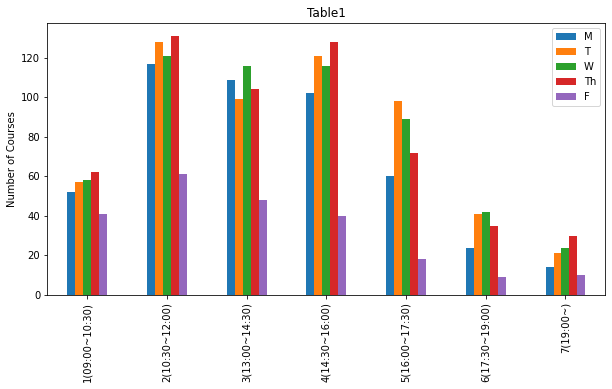

In [6]:
barplotting(course_classification(1,'course',0), 'Table1', 'Courses')

In [7]:
course_classification(1, 'student',0)

,M,T,W,Th,F,R_Total
1(09:00~10:30),1144,1254,1276,1364,902,5940
2(10:30~12:00),2564,2776,2627,2832,1167,11966
3(13:00~14:30),2398,2178,2552,2288,1051,10467
4(14:30~16:00),2194,2632,2487,2776,750,10839
5(16:00~17:30),1366,2314,1959,1610,559,7808
6(17:30~19:00),611,873,988,863,474,3809
7(19:00~),1317,2043,2326,2769,902,9357
C_Total,11594,14070,14215,14502,5805,60186


<AxesSubplot:title={'center':'Table2'}, ylabel='Number of Students'>

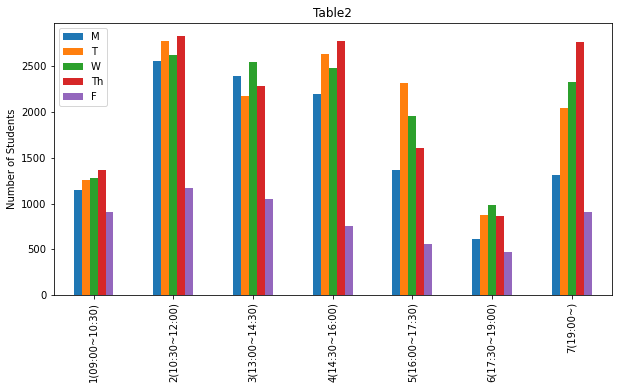

In [8]:
barplotting(course_classification(1,'student',0), 'Table2', 'Students')

In [9]:
course_classification(3, 'course',0)

,M,T,W,Th,F,R_Total
1(09:00~10:30),48,51,51,52,33,235
2(10:30~12:00),111,122,111,123,52,519
3(13:00~14:30),98,89,103,91,40,421
4(14:30~16:00),94,116,102,118,31,461
5(16:00~17:30),43,66,48,50,15,222
6(17:30~19:00),14,30,13,19,7,83
7(19:00~),11,12,14,22,9,68
C_Total,419,486,442,475,187,2009


<AxesSubplot:title={'center':'Table3'}, ylabel='Number of Courses'>

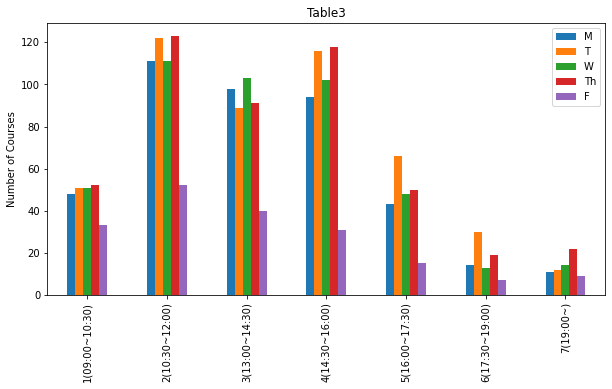

In [10]:
barplotting(course_classification(3,'course',0), 'Table3', 'Courses')

In [11]:
course_classification(3, 'student',0)

,M,T,W,Th,F,R_Total
1(09:00~10:30),1056,1122,1122,1144,726,5170
2(10:30~12:00),2437,2654,2427,2686,1004,11208
3(13:00~14:30),2156,1958,2266,2002,875,9257
4(14:30~16:00),2038,2532,2209,2581,587,9947
5(16:00~17:30),931,1610,1016,1131,437,5125
6(17:30~19:00),410,686,388,505,348,2337
7(19:00~),1017,1143,1383,2026,859,6428
C_Total,10045,11705,10811,12075,4836,49472


<AxesSubplot:title={'center':'Table4'}, ylabel='Number of Students'>

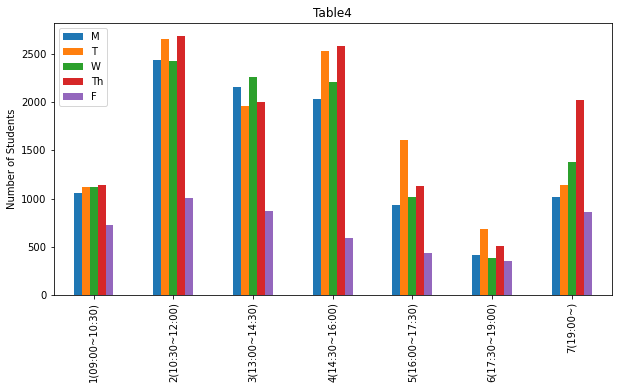

In [12]:
barplotting(course_classification(3,'student',0), 'Table4','Students')

In [13]:
with pd.ExcelWriter(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\3학기\인공지능\Assignment#1\Courses_21F_Analysis_Case1.xlsx') as writer:
    course_classification(1, 'course',0).to_excel(writer, sheet_name='Table1')
    course_classification(1, 'student',0).to_excel(writer, sheet_name='Table2')
    course_classification(3, 'course',0).to_excel(writer, sheet_name='Table3')
    course_classification(3, 'student',0).to_excel(writer, sheet_name='Table4')

# Analysis Result (conservative = 1)

In [14]:
course_classification(1, 'course',1)

,M,T,W,Th,F,R_Total
1(09:00~10:30),47,49,49,52,6,203
2(10:30~12:00),105,118,113,121,14,471
3(13:00~14:30),98,92,102,96,10,398
4(14:30~16:00),89,109,91,113,10,412
5(16:00~17:30),41,61,47,40,8,197
6(17:30~19:00),8,22,10,13,1,54
7(19:00~),12,18,20,25,8,83
C_Total,400,469,432,460,57,1818


<AxesSubplot:title={'center':'Table1'}, ylabel='Number of Courses'>

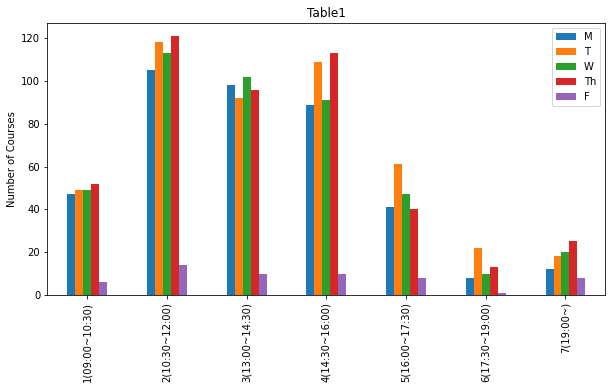

In [15]:
barplotting(course_classification(1,'course',1), 'Table1', 'Courses')

In [16]:
course_classification(1, 'student',1)

,M,T,W,Th,F,R_Total
1(09:00~10:30),1666,1505,1674,1546,64,6455
2(10:30~12:00),3248,3296,3349,3337,352,13582
3(13:00~14:30),2941,2886,3105,2951,217,12100
4(14:30~16:00),2662,3073,2762,3151,186,11834
5(16:00~17:30),994,1339,1158,964,312,4767
6(17:30~19:00),146,460,364,452,29,1451
7(19:00~),264,489,516,515,142,1926
C_Total,11921,13048,12928,12916,1302,52115


<AxesSubplot:title={'center':'Table2'}, ylabel='Number of Students'>

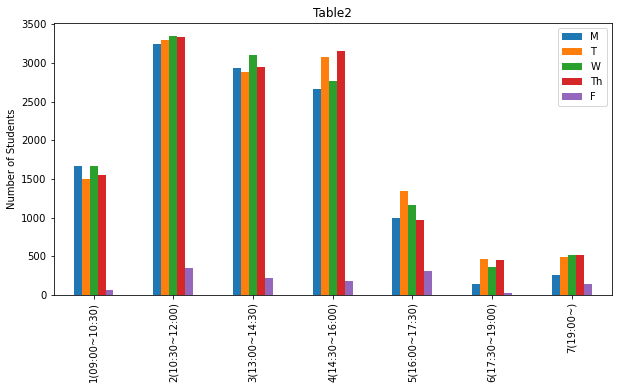

In [17]:
barplotting(course_classification(1,'student',1), 'Table2', 'Students')

In [18]:
course_classification(3, 'course',1)

,M,T,W,Th,F,R_Total
1(09:00~10:30),46,45,48,48,5,192
2(10:30~12:00),100,116,108,119,12,455
3(13:00~14:30),91,84,95,88,9,367
4(14:30~16:00),85,106,87,109,9,396
5(16:00~17:30),35,51,36,35,8,165
6(17:30~19:00),7,22,7,9,1,46
7(19:00~),10,11,13,18,8,60
C_Total,374,435,394,426,52,1681


<AxesSubplot:title={'center':'Table3'}, ylabel='Number of Courses'>

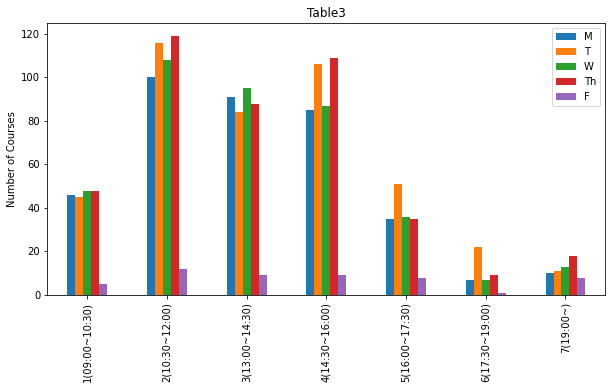

In [19]:
barplotting(course_classification(3,'course',1), 'Table3', 'Courses')

In [20]:
course_classification(3, 'student',1)

,M,T,W,Th,F,R_Total
1(09:00~10:30),1646,1438,1654,1479,28,6245
2(10:30~12:00),3153,3262,3254,3303,148,13120
3(13:00~14:30),2823,2748,2987,2813,202,11573
4(14:30~16:00),2598,3036,2698,3075,171,11578
5(16:00~17:30),874,953,904,882,312,3925
6(17:30~19:00),125,460,166,420,29,1200
7(19:00~),214,317,362,386,142,1421
C_Total,11433,12214,12025,12358,1032,49062


<AxesSubplot:title={'center':'Table4'}, ylabel='Number of Students'>

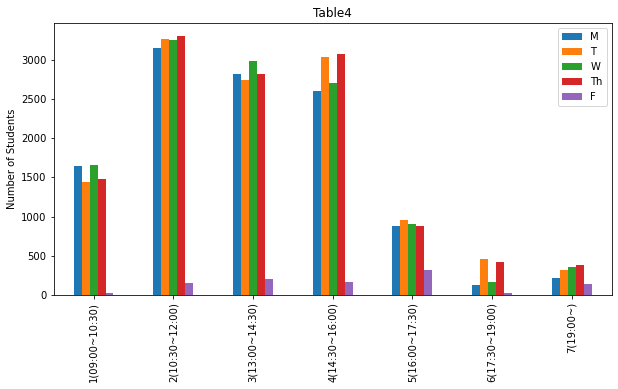

In [21]:
barplotting(course_classification(3,'student',1), 'Table4', 'Students')

In [22]:
with pd.ExcelWriter(r'C:\Users\Yunseok Choi\Google 드라이브\기술경영대학원\3학기\인공지능\Assignment#1\Courses_21F_Analysis_Case2.xlsx') as writer:
    course_classification(1, 'course',1).to_excel(writer, sheet_name='Table1')
    course_classification(1, 'student',1).to_excel(writer, sheet_name='Table2')
    course_classification(3, 'course',1).to_excel(writer, sheet_name='Table3')
    course_classification(3, 'student',1).to_excel(writer, sheet_name='Table4')